In [26]:
c = lambda f: 5 / 9 * (f - 32)

In [27]:
temps = [(f, c(f)) for f   in range(0, 101, 10)]

In [28]:
import pandas as pd

In [29]:
temps

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

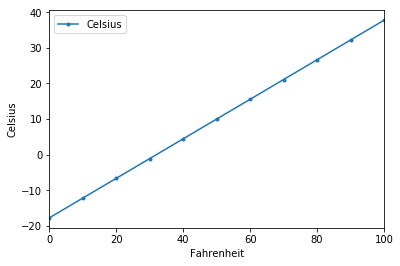

In [30]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit',   y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

In [31]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [32]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [33]:
nyc.describe()

,Date,Value,Anomaly
count,124.000000,124.000000,124.000000
mean,195651.000000,37.595161,0.195161
std,3593.976442,4.539848,4.539848
min,189501.000000,26.100000,-11.300000
25%,192576.000000,34.575000,-2.825000
50%,195651.000000,37.600000,0.200000
75%,198726.000000,40.600000,3.200000
max,201801.000000,47.600000,10.200000


In [34]:
nyc.rename(columns={'Value':'Temperature'}, inplace=True)

In [35]:
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [36]:
nyc['Date'] = nyc['Date'].floordiv(100)

In [37]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [38]:
nyc['Temperature'].describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

In [39]:
from scipy import stats

In [40]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [41]:
linear_regression.slope

0.014771361132966163

In [42]:
linear_regression.intercept

8.694993233674289

In [43]:
linear_regression.slope * 2019   + linear_regression.intercept

38.51837136113297

In [44]:
linear_regression.slope * 2020   + linear_regression.intercept

38.533142722265936

In [45]:
import seaborn as sns

In [46]:
sns.set_style('whitegrid')

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

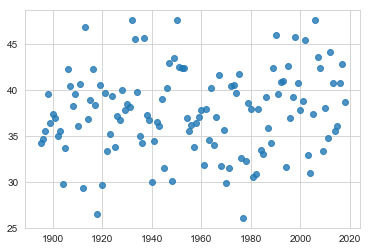

In [47]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)